# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [1]:
#Your code here 
import json
f = open('2016_cdc_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy.

In [2]:
#Your code here
#Check type of master [root] data container
type(data)

dict

In [3]:
#Further details
data.keys()

dict_keys(['meta', 'data'])

In [4]:
#Check second level A.
type(data['meta'])

dict

In [5]:
#Further details
data['meta'].keys()

dict_keys(['view'])

In [6]:
#Check second level B.
type(data['data'])

list

In [7]:
#Further details
len(data['data'])

60266

In [8]:
#Extended: Third Level Details
type(data['data'][0])

list

In [9]:
#Extended: Further Third Level Details (these make up the column entries for each row in the next question)
len(data['data'][0])

42

In [10]:
data['data'][0][8]

'2016'

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [11]:
#Your code here
import pandas as pd

df = pd.DataFrame(data['data'])
print(df.shape)
df.columns = [item['name'] for item in data['meta']['view']['columns']]
print(df.columns)
df.head()

(60266, 42)
Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [12]:
#Preview Asthma Questions in Dataset
df[df.Topic == 'Asthma'].Question.value_counts(normalize=True).cumsum()[:10]

Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       0.186096
Current asthma prevalence among adults aged >= 18 years                                    0.372193
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    0.558289
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    0.744385
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       0.930481
Asthma prevalence among women aged 18-44 years                                             1.000000
Name: Question, dtype: float64

In [13]:
#Preview the Data
cols = ['LocationAbbr', 'LocationDesc', 'DataSource','Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue']
view = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years'][cols]
view.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
4725,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.5
5529,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.7
5632,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,5.6
6777,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.1
7034,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.9


In [14]:
# Notice Multiple Entries for Some States
view.sort_values(by='LocationAbbr').head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
9797,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
10013,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.3
9427,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9
9959,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
9905,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None


In [15]:
df.StratificationCategoryID1.value_counts(normalize=True)

RACE       0.631534
GENDER     0.231673
OVERALL    0.136794
Name: StratificationCategoryID1, dtype: float64

In [16]:
#Further subset
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(110, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9427,9425,332B0889-ED65-4080-9373-D92FE918CD1D,9425,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9426,9424,CD846EC4-617B-4D38-B287-88DCF9BA8751,9424,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


Notice you still have some duplicates!

In [17]:
view.DataValueTypeID.value_counts()

CRDPREV       55
AGEADJPREV    55
Name: DataValueTypeID, dtype: int64

In [18]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')
         & (df.DataValueTypeID == 'CRDPREV')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(55, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

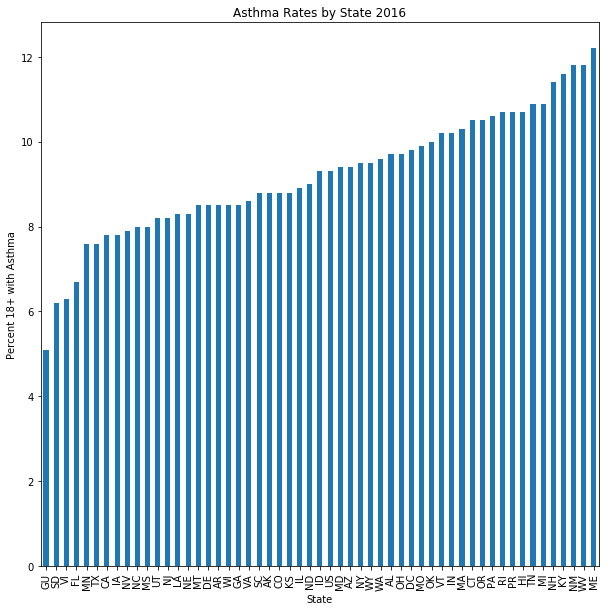

In [20]:
view.DataValue = view.DataValue.astype(float)
view = view.sort_values(by='DataValue')
view.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(10,10))
plt.title('Asthma Rates by State 2016')
plt.ylabel('Percent 18+ with Asthma')
plt.xlabel('State')

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width=350>

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [21]:
# Your code here
def get_header(depth, exn):
    lvl_headers = [['I', 'II', 'III', 'IV', 'V'],
                   ['A', 'B', 'C', 'D', 'E'],
                   [i for i in range(1,6)],
                   ['a', 'b', 'c', 'd', 'e'],
                   ['i', 'ii', 'iii', 'iv', 'v']
                  ]
    depth = depth % 5 #determine index for deeply nested structures
    return lvl_headers[depth][exn]
def get_obj_length(obj):
    if type(obj) == dict:
        return '({} items)'.format(len(obj.keys()))
    elif type(obj) == list:
        return '({} items)'.format(len(obj))
    else:
        return ""
def obj_overview(obj, cur_printout, depth, exn, name=None):
    cur_header = get_header(depth, exn)
    obj_length = get_obj_length(obj)
    if cur_printout == "":
        cur_printout += "{}. root - {} {}".format(cur_header, type(obj), obj_length)
        return cur_printout
    else:
        spaces = ' '*depth*4
        newline = '\n{}{}. {}{} {}'.format(spaces, cur_header, name, type(obj), obj_length)
        cur_printout += newline
        return cur_printout

def print_obj_outline(obj, cur_printout="", depth=0, exn=0, max_en=5, max_depth=10, name=""):
    """obj is the current data object within the json to be processed.
    Call this on the root node, and the function will iteratively build the tree, burrowing down through nested data.
    depth is the current depth you are at within the recursive calls. This determines the indentation and what headers to use.
    exn is which example number you are on for that iteration, again successive calls update this accordingly.
    Name is provided for identifying the keys associated with values from dictionaries."""
    cur_printout = obj_overview(obj, cur_printout, depth=depth, exn=exn, name=name)
    if type(obj) == list:
        n_items = 5
        if len(obj) < n_items:
            n_items = len(obj)
        for n, item in enumerate(obj[:n_items]):
            cur_printout = print_obj_outline(item, cur_printout=cur_printout, depth=depth+1, exn=n)
    elif type(obj) == dict:
        n_items = 5
        if len(obj.keys()) < n_items:
            n_items = len(obj.keys())
        firstn = list(obj.keys())[:n_items]
        for n, key in enumerate(firstn):
            if depth < max_depth:
                cur_printout = print_obj_outline(obj[key], cur_printout=cur_printout, depth=depth+1, exn=n, name=key+' ')
    else:
        pass
    return cur_printout

    
# 1st Draft....work left for demonstrating initial thought process  
# def outline_hierarchy(json_obj):
#     outer_depth = 1 #initialize depth counter
#     inner_depth = 1
#     cur_header = get_header(outer_depth-1, inner_depth-1)
#     output = "{}root - {} {}".format(cur_header, type(json_obj), get_obj_length(json_obj))
#     #Initialize a parent object
#     parent = json_obj
    
#     #Depth first search; easier for creating the string by appending
#     while outer_depth <= 5:
#         while inner_depth <=5:
#             #add a new line to our output
#             spaces = ' '*4*outer_depth #four spaces is equivalent to a tab
#             children = get_children(obj)

In [22]:
outline = print_obj_outline(data)

In [23]:
print(outline)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 